In [19]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Test Data

In [18]:
from stockMarket.api import populate_contracts
from stockMarket.core import Contract

ticker = Contract(ticker='VLTO')
test_contracts = populate_contracts(ticker)
contract = test_contracts[0]
print(contract.free_cashflow)
print(contract.reporting_dates)

[     nan 3317.678 2171.461 1861.404 1952.462 2083.491 1382.081]
[datetime.date(2024, 1, 18), datetime.date(2023, 2, 24), datetime.date(2022, 2, 25), datetime.date(2021, 2, 23), datetime.date(2020, 3, 2), datetime.date(2019, 2, 22), datetime.date(2018, 2, 23)]


### Retrieve Data

In [85]:
from stockMarket.core import get_tickers_from_index
from stockMarket.api import populate_contracts

tickers = get_tickers_from_index('russell2000')
contracts = populate_contracts(tickers, update_period="now")

Calendar Events: 100%|██████████| 1709/1709 [02:10<00:00, 13.10it/s]
/home/jag/Trading/stockMarket/stockMarket/core/pricing.py:25: UserWarning: No prices available for STER
  warnings.warn(f"No prices available for {self.ticker}")
/home/jag/Trading/stockMarket/stockMarket/core/pricing.py:25: UserWarning: No prices available for IRT
  warnings.warn(f"No prices available for {self.ticker}")
/home/jag/Trading/stockMarket/stockMarket/core/pricing.py:25: UserWarning: No prices available for ESNT
  warnings.warn(f"No prices available for {self.ticker}")
/home/jag/Trading/stockMarket/stockMarket/core/pricing.py:25: UserWarning: No prices available for EVC
  warnings.warn(f"No prices available for {self.ticker}")
/home/jag/Trading/stockMarket/stockMarket/core/pricing.py:25: UserWarning: No prices available for MGNX
  warnings.warn(f"No prices available for {self.ticker}")
/home/jag/Trading/stockMarket/stockMarket/core/pricing.py:25: UserWarning: No prices available for NE
  warnings.warn(f"No 

### Initialize Ranking

In [86]:
from stockMarket.ranking import Ranking
from stockMarket.ranking.specialRankingObjects import (
    create_equity_ratio_ranker,
    create_netto_margin_ranker,
    create_return_on_assets_ranker,
    create_goodwill_ranker,
    create_gearing_ranker,
    create_dynamic_gearing_ranker,
    create_asset_coverage_ratio_ranker,
    create_third_order_liquidity_ranker,
    create_peg_ranker,
    create_prg_ranker,
    create_pfcg_ranker,
    create_pbg_ranker,
)

years_back = 2

equity_ratio_ranker = create_equity_ratio_ranker([10, 30], [0,1,2])
netto_margin_ranker = create_netto_margin_ranker([10, 20, 30], [0,1,2, 3])
return_on_assets_ranker = create_return_on_assets_ranker([5, 10, 15], [0,1,2,3])
goodwill_ranker = create_goodwill_ranker([0, 30], [0,1,0])
gearing_ranker = create_gearing_ranker([10, 35, 60], [3,2,1,0])
dynamic_gearing_ranker = create_dynamic_gearing_ranker([1, 2, 5], [3,2,1,0])
current_assets_coverage_ratio_ranker = create_asset_coverage_ratio_ranker([100, 130], [0,1,2])
third_order_liquidity_ranker = create_third_order_liquidity_ranker([150, 500], [0,1,2])
peg_ranker_callable = lambda x, y: create_peg_ranker(growth_years=3, cutoffs=[0.5, 1.2], scores=[2,1,0], date=x, years_back=y)
prg_ranker_callable = lambda x, y: create_prg_ranker(growth_years=3, cutoffs=[0.2, 0.4], scores=[2,1,0], date=x, years_back=y)
pfcg_ranker_callable = lambda x, y: create_pfcg_ranker(growth_years=3, cutoffs=[0.6, 1.2], scores=[2,1,0], date=x, years_back=y)
pbg_ranker_callable = lambda x, y: create_pbg_ranker(growth_years=3, cutoffs=[0.4, 1.0], scores=[2,1,0], date=x, years_back=y)

ranking_list = [
    equity_ratio_ranker,
    netto_margin_ranker,
    return_on_assets_ranker,
    goodwill_ranker,
    gearing_ranker,
    dynamic_gearing_ranker,
    current_assets_coverage_ratio_ranker,
    third_order_liquidity_ranker,
    peg_ranker_callable,
    prg_ranker_callable,
    pfcg_ranker_callable,
    pbg_ranker_callable,
    
]

peg_ranker = peg_ranker_callable(None, years_back)
prg_ranker = prg_ranker_callable(None, years_back)
pfcg_ranker = pfcg_ranker_callable(None, years_back)
pbg_ranker = pbg_ranker_callable(None, years_back)

### Perform Ranking

In [87]:
ranking = Ranking(contracts, ranking_list, years_back=years_back)
ranking.rank()
ranking.ranking.to_csv("ranking_contracts.csv", sep=',', encoding='utf-8', float_format='%.2f')
ranking.ranking

/home/jag/Trading/stockMarket/stockMarket/core/financialStatement/balance.py:44: RuntimeWarning: divide by zero encountered in divide
  @property
/home/jag/Trading/stockMarket/stockMarket/core/financialStatement/income.py:29: RuntimeWarning: divide by zero encountered in divide
  return self.net_income / self.revenue * 100
/home/jag/Trading/stockMarket/stockMarket/core/contract.py:187: RuntimeWarning: divide by zero encountered in divide
  return self.income.net_income / self.balance.total_assets * 100
/home/jag/Trading/stockMarket/stockMarket/core/contract.py:191: RuntimeWarning: divide by zero encountered in divide
  return (self.total_short_term_debt + self.total_long_term_debt - self.cash_and_short_term_investments)/self.cashflow.free_cashflow
/home/jag/Trading/stockMarket/stockMarket/core/contract.py:191: RuntimeWarning: invalid value encountered in divide
  return (self.total_short_term_debt + self.total_long_term_debt - self.cash_and_short_term_investments)/self.cashflow.free_ca

,Name,Sector,Relative Score,Absolute Score,No Data/Constraints/Tot.,Equity Ratio,Equity Ratio Score,Netto Margin,Netto Margin Score,Return on Assets,...,Third Order Liquidity,Third Order Liquidity Score,PEG,PEG Score,PRG,PRG Score,PFCG,PFCG Score,PBG,PBG Score
GAMB,Gambling.com Group Limited,Consumer Cyclical,100.00%,8.00/8,4*0*12,75.385056,1.0,54.149392,1.0,33.384748,...,729.208710,1.0,NaN,0,NaN,0,NaN,0,NaN,0
CPRX,"Catalyst Pharmaceuticals, Inc.",Healthcare,100.00%,8.00/8,4*0*12,88.169574,1.0,62.972400,1.0,38.981787,...,880.616471,1.0,NaN,0,NaN,0,NaN,0,NaN,0
CORT,Corcept Therapeutics Incorporated,Healthcare,100.00%,8.00/8,4*0*12,88.684526,1.0,30.742832,1.0,26.551128,...,664.165005,1.0,NaN,0,NaN,0,NaN,0,NaN,0
FLGT,"Fulgent Genetics, Inc.",Healthcare,100.00%,8.00/8,4*0*12,81.287466,1.0,50.819042,1.0,30.595565,...,2206.371144,1.0,NaN,0,NaN,0,NaN,0,NaN,0
SIGA,"SIGA Technologies, Inc.",Healthcare,100.00%,8.00/8,4*0*12,86.626220,1.0,45.088289,1.0,37.603609,...,3178.133417,1.0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STHO,Star Holdings,Real Estate,0.00%,0.00/0,12*0*12,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,0
CPTN,"Cepton, Inc.",Technology,0.00%,0.00/0,12*0*12,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,0
RGTI,"Rigetti Computing, Inc.",Technology,0.00%,0.00/0,12*0*12,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,0
VCSA,"Vacasa, Inc.",Technology,0.00%,0.00/0,12*0*12,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,0


### Plot Stuff

ValueError: `dataset` input should have multiple elements.

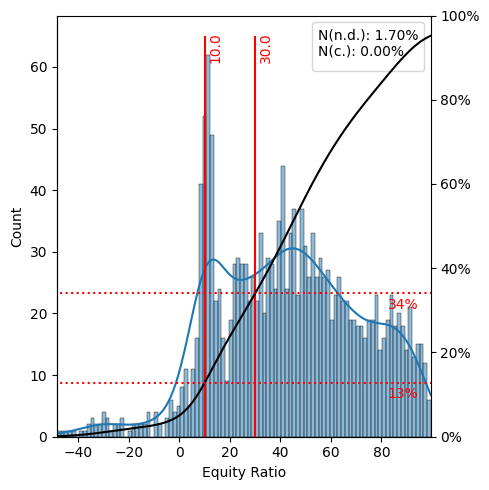

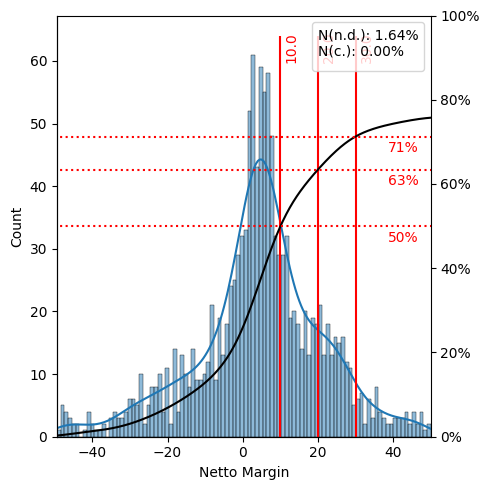

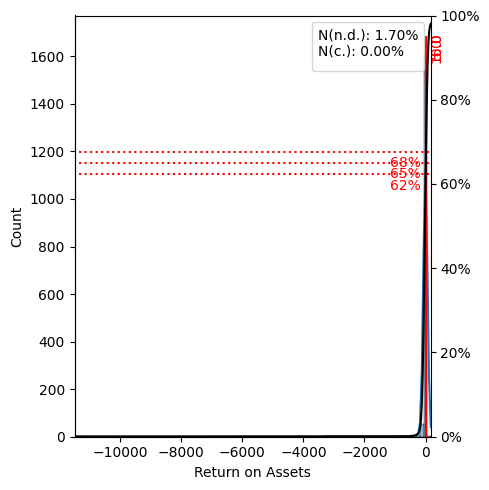

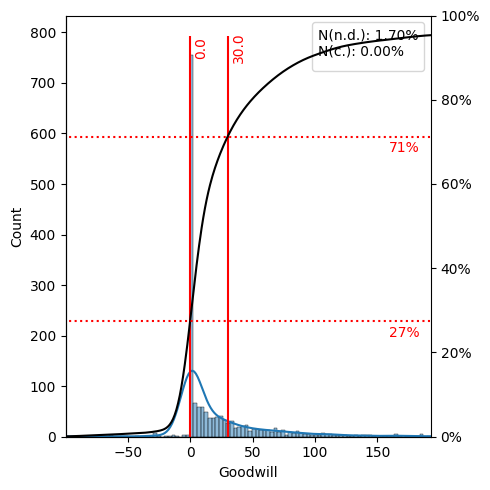

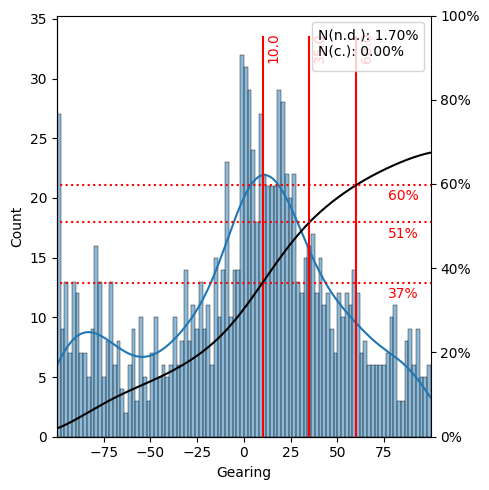

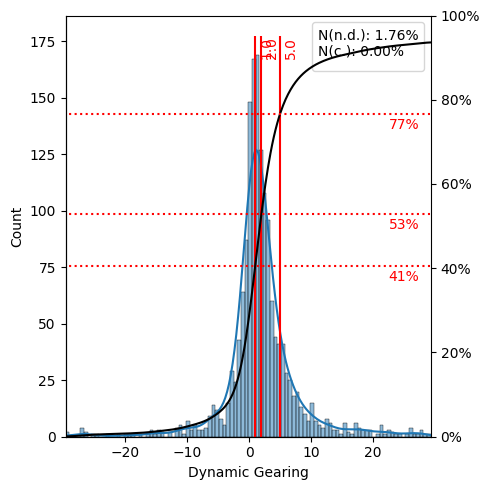

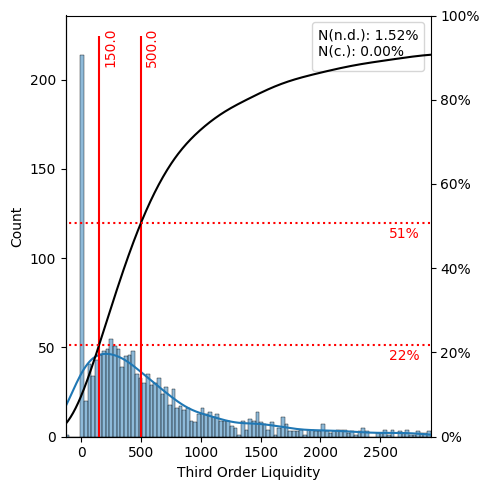

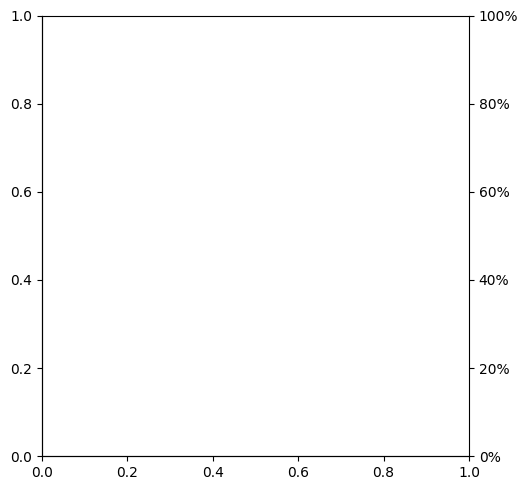

In [89]:
from stockMarket.ranking.rankingPlotter import RankingPlotter

ranking_plotter = RankingPlotter(ranking)
ranking_plotter.plot(equity_ratio_ranker, "equity_ratio.png", (-50, 100))
ranking_plotter.plot(netto_margin_ranker, "netto_margin.png", (-50, 50))
ranking_plotter.plot(return_on_assets_ranker, "return_on_assets.png")
ranking_plotter.plot(goodwill_ranker, "goodwill.png", (-100, 199))
ranking_plotter.plot(gearing_ranker, "gearing.png", (-100, 100))
ranking_plotter.plot(dynamic_gearing_ranker, "dynamic_gearing.png", (-30, 30))
ranking_plotter.plot(current_assets_coverage_ratio_ranker, "current_assets_coverage_ratio.png")
ranking_plotter.plot(third_order_liquidity_ranker, "third_order_liquidity.png", (-1000, 3000))
ranking_plotter.plot(peg_ranker, "peg.png", (0, 10))
ranking_plotter.plot(prg_ranker, "prg.png", (0, 3))
ranking_plotter.plot(pfcg_ranker, "pfcg.png", (0, 10))
ranking_plotter.plot(pbg_ranker, "pbg.png", (0, 10))

plotting_files = [
    "equity_ratio.png",
    "netto_margin.png",
    "return_on_assets.png",
    "goodwill.png",
    "gearing.png",
    "dynamic_gearing.png",
    "current_assets_coverage_ratio.png",
    "third_order_liquidity.png",
    "peg.png",
    "prg.png",
    "pfcg.png",
    "pbg.png"
]

### Backtesting

  0%|          | 0/1 [00:00<?, ?it/s]/home/jag/Trading/stockMarket/stockMarket/core/financialStatement/balance.py:44: RuntimeWarning: divide by zero encountered in divide
  @property
/home/jag/Trading/stockMarket/stockMarket/core/financialStatement/income.py:29: RuntimeWarning: divide by zero encountered in divide
  return self.net_income / self.revenue * 100
/home/jag/Trading/stockMarket/stockMarket/core/contract.py:187: RuntimeWarning: divide by zero encountered in divide
  return self.income.net_income / self.balance.total_assets * 100
/home/jag/Trading/stockMarket/stockMarket/core/contract.py:191: RuntimeWarning: divide by zero encountered in divide
  return (self.total_short_term_debt + self.total_long_term_debt - self.cash_and_short_term_investments)/self.cashflow.free_cashflow
/home/jag/Trading/stockMarket/stockMarket/core/contract.py:191: RuntimeWarning: invalid value encountered in divide
  return (self.total_short_term_debt + self.total_long_term_debt - self.cash_and_short_te

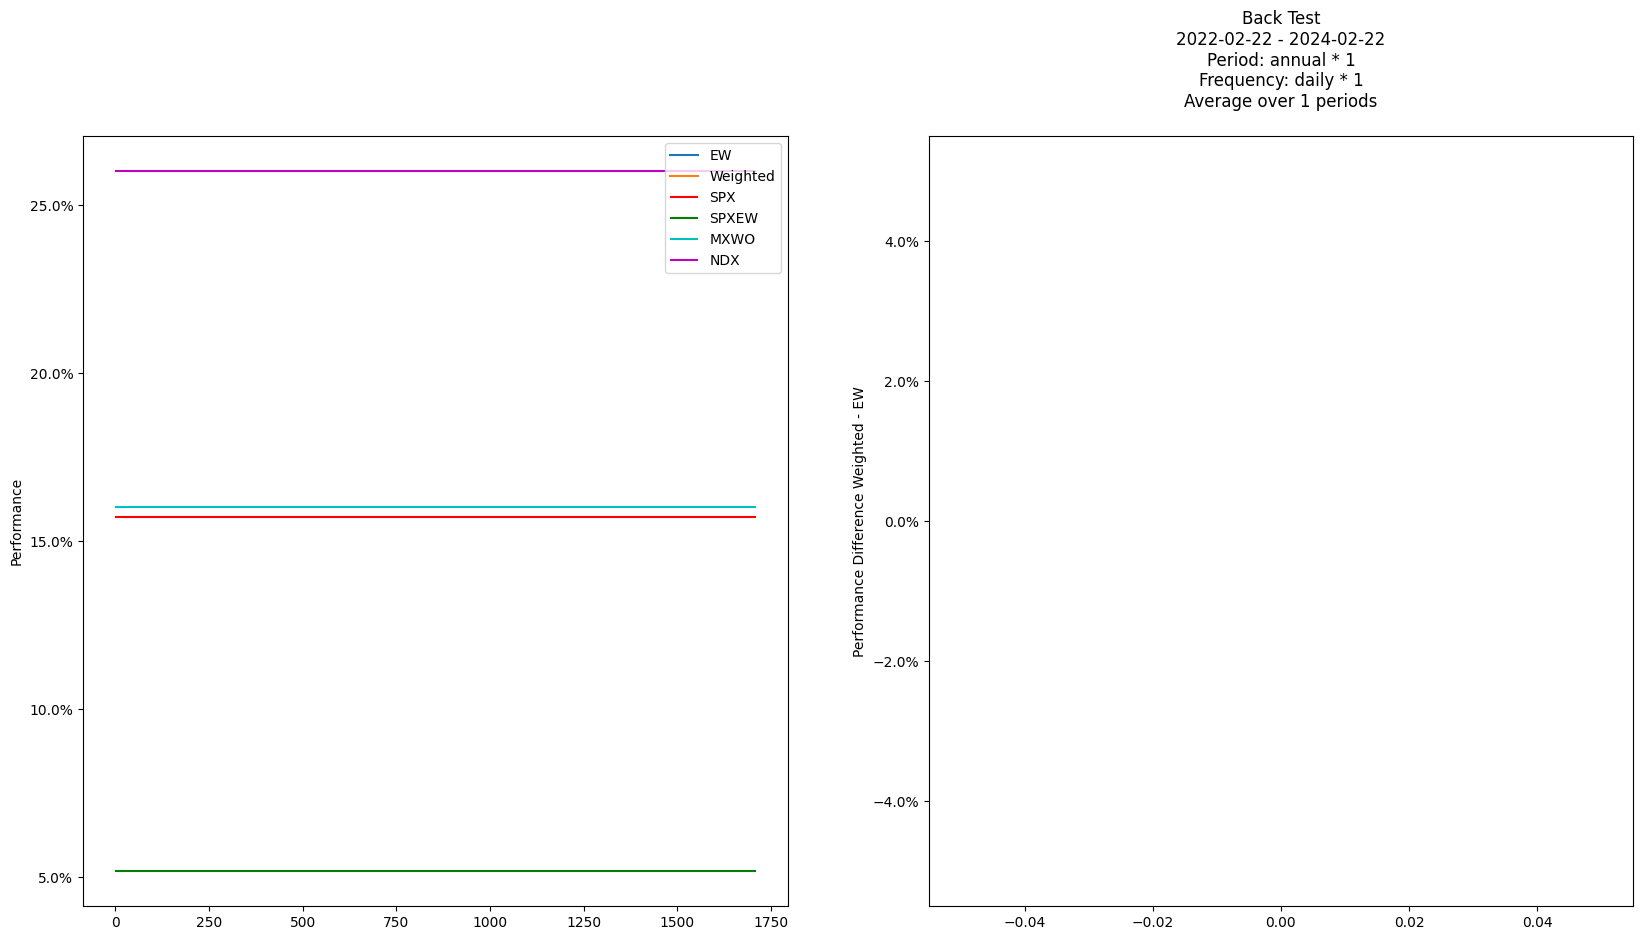

ValueError: a cannot be empty

In [91]:
import datetime as dt

from stockMarket.ranking.backTester.backTester import BackTester
from stockMarket.utils.period import Period

back_tester = BackTester(contracts, ranking_list)
start_date = dt.date.today() # - dt.timedelta(days=364*0.5)
end_date = dt.date.today() # - dt.timedelta(days=365)
years_back = 2
# period = Period("monthly", amount=6)
period = Period("annual", amount=2)
frequency = "daily"
back_tester.back_test(date=start_date, end_date=end_date, period=period, frequency=frequency, years_back=years_back)
back_tester.plot_cumulative_performance()
back_tester.plot_single_performances()

In [84]:
back_tester.ranking.ranking
# back_tester.prices

,Name,Sector,Relative Score,Absolute Score,No Data/Constraints/Tot.,Equity Ratio,Equity Ratio Score,Netto Margin,Netto Margin Score,Return on Assets,...,Goodwill,Goodwill Score,Gearing,Gearing Score,PEG,PEG Score,PRG,PRG Score,PFCG,PFCG Score
EA,Electronic Arts Inc.,Communication Services,100.00%,5.0/5,3*0*8,67.143629,1.0,54.885317,1.0,27.348812,...,25.264710,1.0,-50.810883,1.0,NaN,0.0,NaN,0.0,NaN,0.0
META,"Meta Platforms, Inc.",Communication Services,100.00%,5.0/5,3*0*8,80.525496,1.0,33.904496,1.0,18.294459,...,14.849170,1.0,-42.686881,1.0,NaN,0.0,NaN,0.0,NaN,0.0
BIO,"Bio-Rad Laboratories, Inc.",Healthcare,100.00%,5.0/5,3*0*8,71.858638,1.0,76.078479,1.0,21.959121,...,4.589546,1.0,-7.983327,1.0,NaN,0.0,NaN,0.0,NaN,0.0
CPRT,"Copart, Inc.",Industrials,100.00%,5.0/5,3*0*8,72.050013,1.0,31.733424,1.0,20.256270,...,13.802763,1.0,0.981918,1.0,NaN,0.0,NaN,0.0,NaN,0.0
PSA,Public Storage,Real Estate,100.00%,5.0/5,3*0*8,83.295434,1.0,54.045414,1.0,13.437357,...,1.953018,1.0,14.934515,1.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAL,"Delta Air Lines, Inc.",Industrials,0.00%,0.0/5,3*0*8,2.130674,0.0,-72.448084,0.0,-17.202345,...,635.788787,0.0,1270.860495,0.0,NaN,0.0,NaN,0.0,NaN,0.0
GE,General Electric Company,Industrials,0.00%,0.0/5,3*0*8,9.959431,0.0,-23.042510,0.0,-7.186118,...,109.660760,0.0,125.780317,0.0,NaN,0.0,NaN,0.0,NaN,0.0
VLTO,Veralto Corporation,Industrials,0.00%,0/0,8*0*8,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
CEG,Constellation Energy Corporation,Utilities,0.00%,0/0,8*0*8,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


### Write Email

In [90]:
from stockMarket.utils import write_email

emails = ["benjaminlantschner@gmail.com", "97gamjak@gmail.com"]
subject = "Stock Market Ranking"
body = ""
attachment = ["ranking_contracts.csv"] #+ plotting_files
write_email(emails, subject, body, attachment)